In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [9]:
# 创建一条含有噪声的正弦曲线
rng = np.random.RandomState(1) #生成随机数种子
X = np.sort(5 * rng.rand(80,1), axis=0) #生成0-5的横坐标，且为二维数组
y = np.sin(X).ravel() #将sin函数值求出来并降维，一维数组不分行列即80个对象
y[::5] += 3 * (0.5 - rng.rand(16)) #每隔5个数生成在-1.5到1.5之间的噪声数据，总计16个

In [11]:
# 实例化&训练模型
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
# 测试集导入模型，预测结果
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] #np.arrange(开始点，结束点，步长) 生成有序数组的函数
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

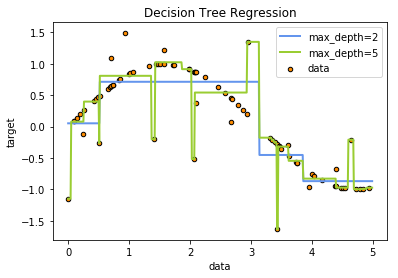

In [14]:
# 绘制图像
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()